# Imporing Libraries and Understanding the Data 

In [16]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [17]:
df = pd.read_csv("hotel_bookings.csv")

In [18]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Data Cleaning

In [20]:
# dropping the unnecessary columns

df = df.drop(columns = ['company', 'agent', 'country'])

In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [22]:
# We have 4 null values in Children column, we consider taking the median value of the column and it is 0.

df.fillna(0, inplace = True)

In [23]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [24]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [25]:
#value in the arrival_date_month

df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [26]:
# Create a dictionary to map months to numerical values

month_mapping = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}


# Use the map function to apply the mapping to the dataframe

df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [28]:
# Covert first to a string and then concatenate

df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'].astype(str) + '-' +
                                    df['arrival_date_day_of_month'].astype(str)
                                    )

# Drop the individual date columns if needed
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119390 non-null  float64       
 8   babies                          119390 non-null  int64         
 9   meal                            119390 non-null  object        
 10  market_segment                  119390 non-null  object 

In [29]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [30]:
# Convert 'reservation_status_date' column to datetime format

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [31]:
# Print the updated dataframe to see the changes

print(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_week_number                   int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
days_in_waiting_list                       int64
customer_type       

In [32]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')


In [33]:
# Rename columns
# Use a dictionary that mapps current column name to provided name

columns_rename = {
    'hotel': 'Hotel Type',
    'is_canceled': 'Reservation Canceled',
    'lead_time': 'Lead Time',
    'arrival_date_week_number': 'Arrival Week',
    'stays_in_weekend_nights': 'Weekend Nights',
    'stays_in_week_nights': 'Week Nights',
    'meal': 'Meal Type',
    'market_segment': 'Market Segment',
    'distribution_channel': 'Distribution Channel',
    'is_repeated_guest': 'Repeated Guest',
    'previous_cancellations': 'Previous Cancellations',
    'previous_bookings_not_canceled': 'Previous Bookings (Not Canceled)',
    'reserved_room_type': 'Reserved Room Type',
    'assigned_room_type': 'Assigned Room Type',
    'booking_changes': 'Booking Changes',
    'deposit_type': 'Deposit Type',
    'days_in_waiting_list': 'Days in Waiting List',
    'customer_type': 'Customer Type',
    'adr': 'Average Daily Rate',
    'required_car_parking_spaces': 'Parking Spaces Required',
    'total_of_special_requests': 'Special Requests Total',
    'reservation_status': 'Reservation Status',
    'reservation_status_date': 'Reservation Status Date',
    'arrival_date': 'Arrival Date'

}

# Apply the mapping to rename the columns
df.rename(columns = columns_rename, inplace=True)

df.head()
     

,Hotel Type,Reservation Canceled,Lead Time,Arrival Week,Weekend Nights,Week Nights,adults,children,babies,Meal Type,...,Booking Changes,Deposit Type,Days in Waiting List,Customer Type,Average Daily Rate,Parking Spaces Required,Special Requests Total,Reservation Status,Reservation Status Date,Arrival Date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [34]:
# Checking for duplicates

df.duplicated(keep=False).sum()

42532

In [35]:
# Drop the duplicated rows

df.drop_duplicates(keep='first', inplace=True)

In [36]:
df.duplicated(keep=False).sum()

0

In [37]:
# Print the unique values for categorical columns

# Select categorical columns
cat_columns = df.select_dtypes(include=['object'])


# Calculate the frequency of categorical values in each selected column
frequency_counts = {}

for column in cat_columns:
    frequency_counts[column] = df[column].value_counts()

# Print the frequency counts for each categorical column
for column, counts in frequency_counts.items():
    print(f"Frequency counts for {column}:")
    print(counts)
    print()  # Add a blank line for better readability

Frequency counts for Hotel Type:
Hotel Type
City Hotel      52013
Resort Hotel    33585
Name: count, dtype: int64

Frequency counts for Meal Type:
Meal Type
BB           66524
SC            9359
HB            8887
Undefined      470
FB             358
Name: count, dtype: int64

Frequency counts for Market Segment:
Market Segment
Online TA        51131
Offline TA/TO    13367
Direct           11692
Groups            4430
Corporate         4071
Complementary      699
Aviation           206
Undefined            2
Name: count, dtype: int64

Frequency counts for Distribution Channel:
Distribution Channel
TA/TO        67781
Direct       12831
Corporate     4806
GDS            175
Undefined        5
Name: count, dtype: int64

Frequency counts for Reserved Room Type:
Reserved Room Type
A    54988
D    17238
E     6011
F     2812
G     2049
B      980
C      912
H      596
L        6
P        6
Name: count, dtype: int64

Frequency counts for Assigned Room Type:
Assigned Room Type
A    45028
D   

# Resampling to balance out the occurences of Hotel Type

In [38]:
city_hotel_df = df[df['Hotel Type'] == 'City Hotel']
resort_hotel_df = df[df['Hotel Type'] == 'Resort Hotel']

# Sample equal occurrences for each hotel type
num_samples = min(len(city_hotel_df), len(resort_hotel_df))

balanced_city_hotel_df = city_hotel_df.sample(n=num_samples, random_state=42)
balanced_resort_hotel_df = resort_hotel_df.sample(n=num_samples, random_state=42)

# Concatenate the balanced dataframes
data = pd.concat([balanced_city_hotel_df, balanced_resort_hotel_df])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67170 entries, 50573 to 20232
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Hotel Type                        67170 non-null  object        
 1   Reservation Canceled              67170 non-null  int64         
 2   Lead Time                         67170 non-null  int64         
 3   Arrival Week                      67170 non-null  int64         
 4   Weekend Nights                    67170 non-null  int64         
 5   Week Nights                       67170 non-null  int64         
 6   adults                            67170 non-null  int64         
 7   children                          67170 non-null  float64       
 8   babies                            67170 non-null  int64         
 9   Meal Type                         67170 non-null  object        
 10  Market Segment                    67170 non-nul

In [39]:

# Print unique values for categorical colums
# Select categorical columns excluding 'CustomerID'
cat_columns = data.select_dtypes(include=['object'])


# Calculate the frequency of categorical values in each selected column
frequency_counts = {}

for column in cat_columns:
    frequency_counts[column] = data[column].value_counts()

# Print the frequency counts for each categorical column
for column, counts in frequency_counts.items():
    print(f"Frequency counts for {column}:")
    print(counts)
    print()  # Add a blank line for better readability
     

Frequency counts for Hotel Type:
Hotel Type
City Hotel      33585
Resort Hotel    33585
Name: count, dtype: int64

Frequency counts for Meal Type:
Meal Type
BB           52275
HB            7996
SC            6076
Undefined      470
FB             353
Name: count, dtype: int64

Frequency counts for Market Segment:
Market Segment
Online TA        38855
Offline TA/TO    10960
Direct            9783
Groups            3617
Corporate         3298
Complementary      516
Aviation           140
Undefined            1
Name: count, dtype: int64

Frequency counts for Distribution Channel:
Distribution Channel
TA/TO        52378
Direct       10732
Corporate     3937
GDS            119
Undefined        4
Name: count, dtype: int64

Frequency counts for Reserved Room Type:
Reserved Room Type
A    42019
D    13486
E     5492
F     2165
G     1879
C      903
B      620
H      596
L        6
P        4
Name: count, dtype: int64

Frequency counts for Assigned Room Type:
Assigned Room Type
A    33634
D   

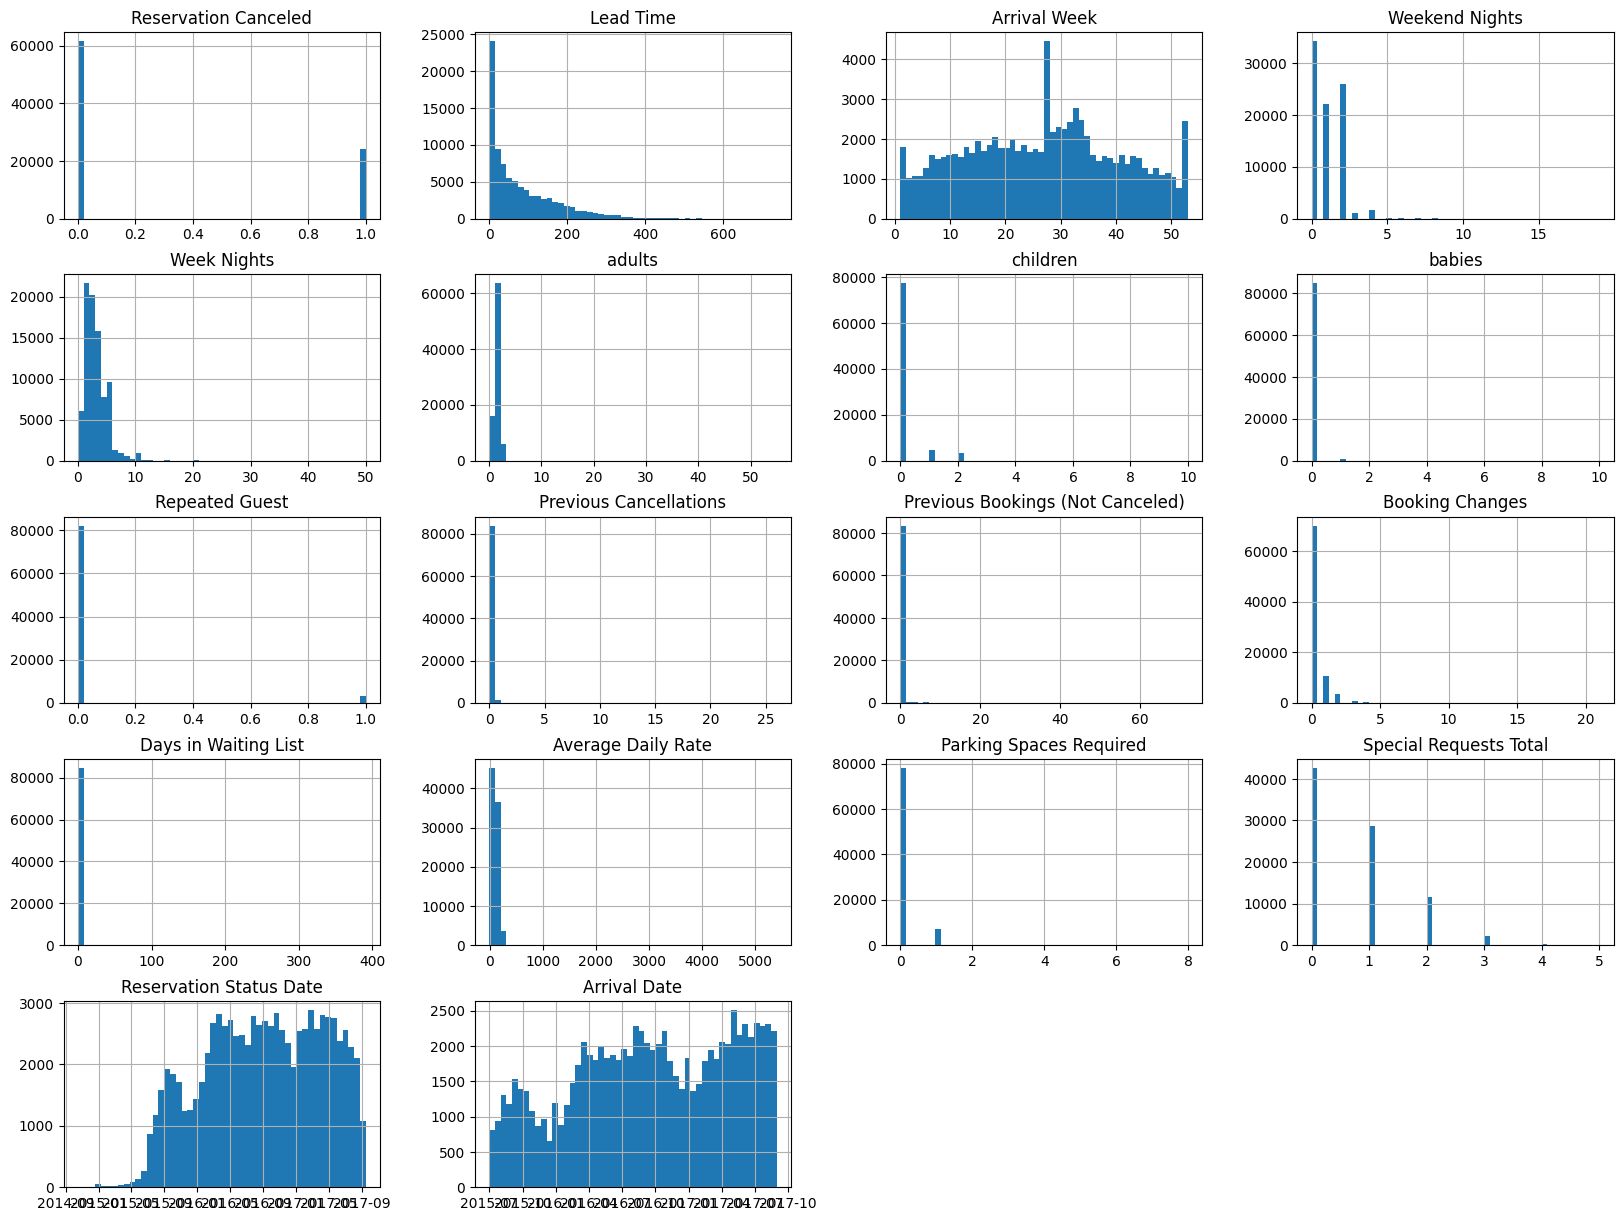

In [40]:
# Data distribution for numeric columns

df.hist(bins=50, figsize=(20, 15))

plt.show()

In [41]:

# Select columns with dtype object
categorical_columns = df.select_dtypes(include=['object'])

df_numerical = df.select_dtypes(include=['int64', 'float64'])

print("Categorical Columns")
print(categorical_columns.columns)
print()
print("Numerical Columns")
print(df_numerical.columns)
     

Categorical Columns
Index(['Hotel Type', 'Meal Type', 'Market Segment', 'Distribution Channel',
       'Reserved Room Type', 'Assigned Room Type', 'Deposit Type',
       'Customer Type', 'Reservation Status'],
      dtype='object')

Numerical Columns
Index(['Reservation Canceled', 'Lead Time', 'Arrival Week', 'Weekend Nights',
       'Week Nights', 'adults', 'children', 'babies', 'Repeated Guest',
       'Previous Cancellations', 'Previous Bookings (Not Canceled)',
       'Booking Changes', 'Days in Waiting List', 'Average Daily Rate',
       'Parking Spaces Required', 'Special Requests Total'],
      dtype='object')


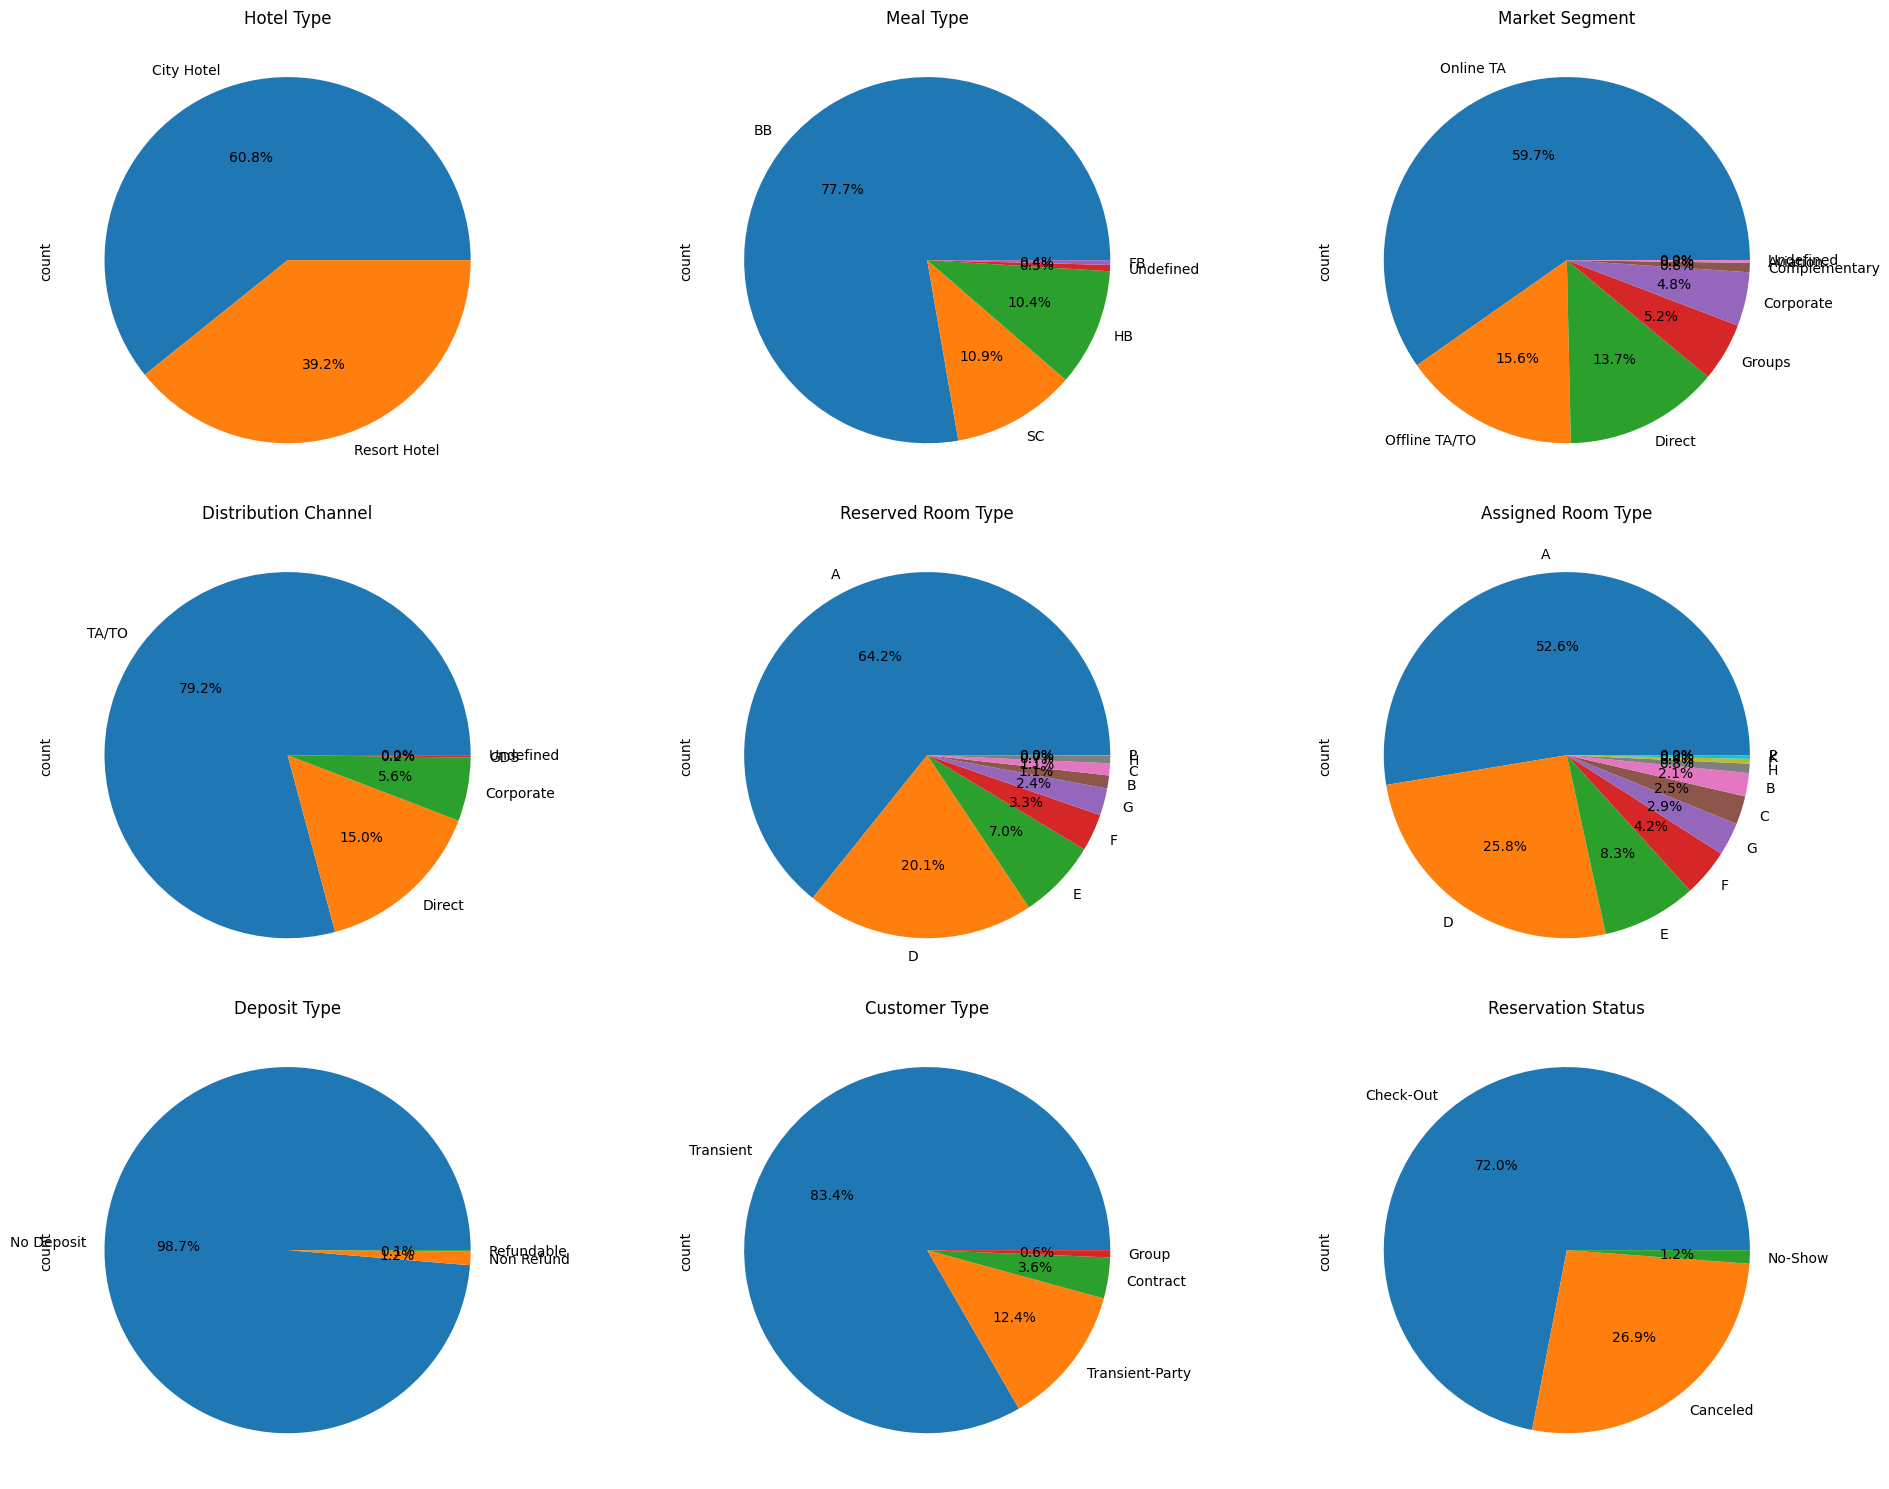

In [42]:
categorical_columns = ['Hotel Type', 'Meal Type', 'Market Segment', 'Distribution Channel',
       'Reserved Room Type', 'Assigned Room Type', 'Deposit Type',
       'Customer Type', 'Reservation Status']

#categorical_columns = df.select_dtypes(include=['object'])

# Calculate the number of rows and columns based on the number of categorical columns and subplots per row
num_cols = 3  # Number of subplots per row
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Integer division to calculate rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Iterate through each categorical column and plot a pie chart
for i, col in enumerate(categorical_columns):
    ax = axes[i // num_cols, i % num_cols]  # Select the subplot based on the index
    df[col].value_counts().plot.pie(ax=ax, autopct='%1.1f%%')  # Plot the pie chart
    ax.set_title(col)  # Set the title for the subplot

# Hide any unused subplots
for j in range(len(categorical_columns), num_rows * num_cols):
    axes.flatten()[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()


# __Exploratory Data Analysis__

# Problems Solving

# 1. Comparison of Hotel Type and type of stay

In [46]:
# Grouping by hotel type and calculating total weekend nights and week nights
hotel_stays = df.groupby('Hotel Type').agg({
    'Weekend Nights': 'sum',
    'Week Nights': 'sum'
}).reset_index()

# Rename columns for clarity
hotel_stays.columns = ['Hotel Type', 'Total Stays in Weekend Nights', 'Total Stays in Week Nights']

hotel_stays.head()

,Hotel Type,Total Stays in Weekend Nights,Total Stays in Week Nights
0,City Hotel,45518,118707
1,Resort Hotel,40913,106871


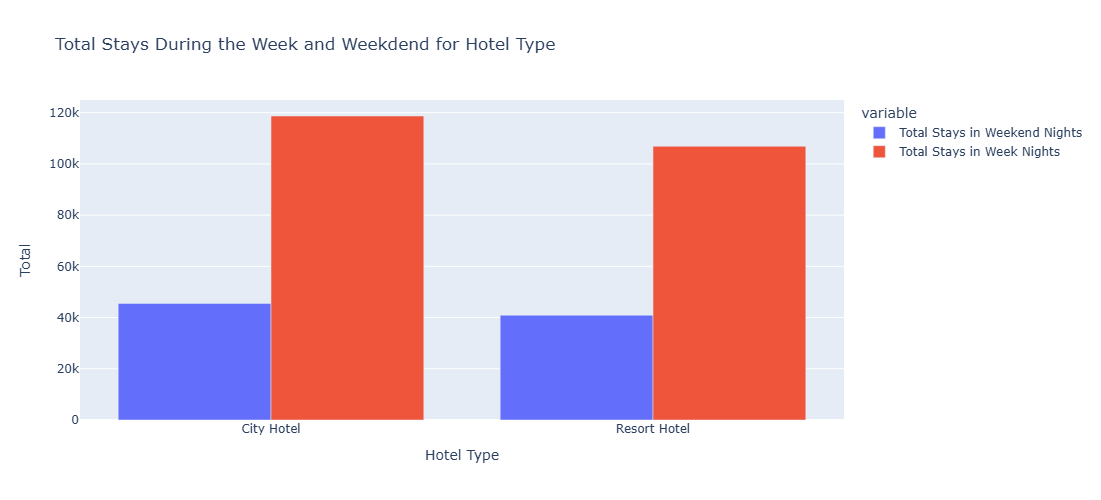

In [83]:
# Plotting a grouped bar graph

fig = px.bar(hotel_stays, x = 'Hotel Type',
             y=['Total Stays in Weekend Nights', 'Total Stays in Week Nights'],
             labels={'value': 'Total'},
             title='Total Stays During the Week and Weekdend for Hotel Type',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1100,  # Set the width of the entire plot
    height=500,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)

fig.show()
     

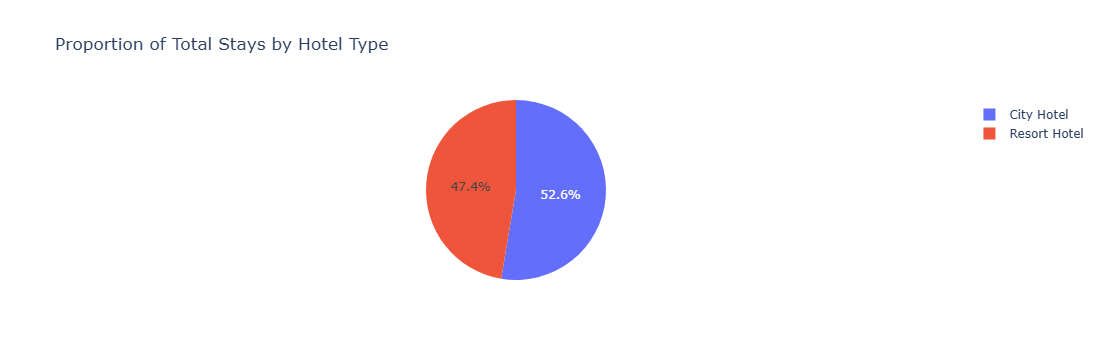

In [48]:
# Calculate the total stays for each hotel type
hotel_stays['Total Stays'] = hotel_stays['Total Stays in Weekend Nights'] + hotel_stays['Total Stays in Week Nights']

# Create a pie chart to show the proportion of total stays for each hotel type
fig = px.pie(hotel_stays, values='Total Stays', names='Hotel Type',
             title='Proportion of Total Stays by Hotel Type')

# Show the plot
fig.show()

     

# 2. Customer type for the hotel types

In [49]:
# Group by Customer Type and calculate the total weekend nights and week nights

customer_type = df.groupby(['Hotel Type', 'Customer Type']).size().reset_index(name='Count')
customer_type

,Hotel Type,Customer Type,Count
0,City Hotel,Contract,1438
1,City Hotel,Group,270
2,City Hotel,Transient,44143
3,City Hotel,Transient-Party,6162
4,Resort Hotel,Contract,1658
5,Resort Hotel,Group,273
6,Resort Hotel,Transient,27206
7,Resort Hotel,Transient-Party,4448


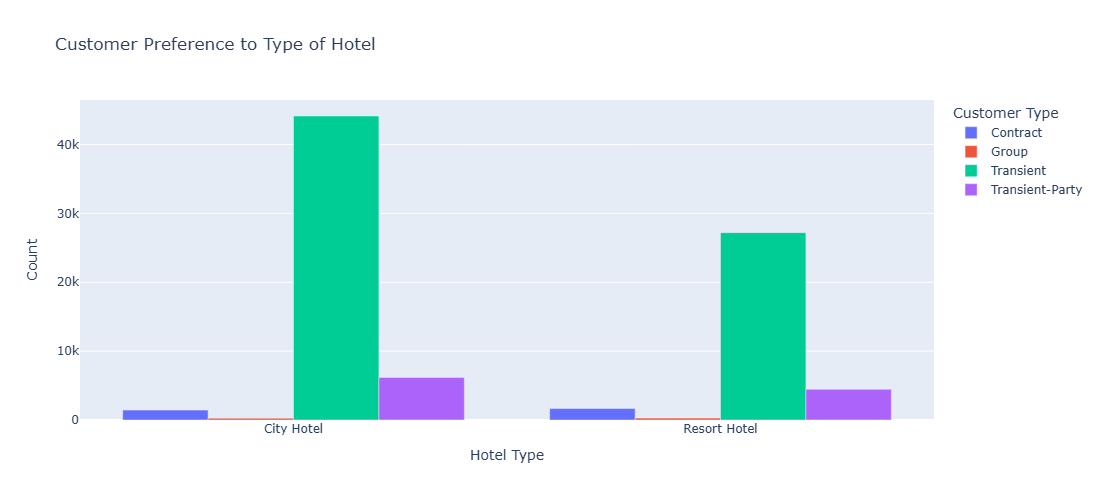

In [85]:
# Plot bar graphs
fig = px.bar(customer_type, x='Hotel Type', y='Count', color='Customer Type',
             title='Customer Preference to Type of Hotel', labels={'value': 'Total'},
             barmode = 'group'
             )


# Update layout to vary length and width
fig.update_layout(
    width=1100,  # Set the width of the entire plot
    height=500,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)


fig.show()
     


# 3. Lead time comparison among different hotels types

In [51]:
average_lead_time = df.groupby('Hotel Type')['Lead Time'].mean().reset_index(name='Average Lead Time')

average_lead_time


,Hotel Type,Average Lead Time
0,City Hotel,77.058793
1,Resort Hotel,83.121423


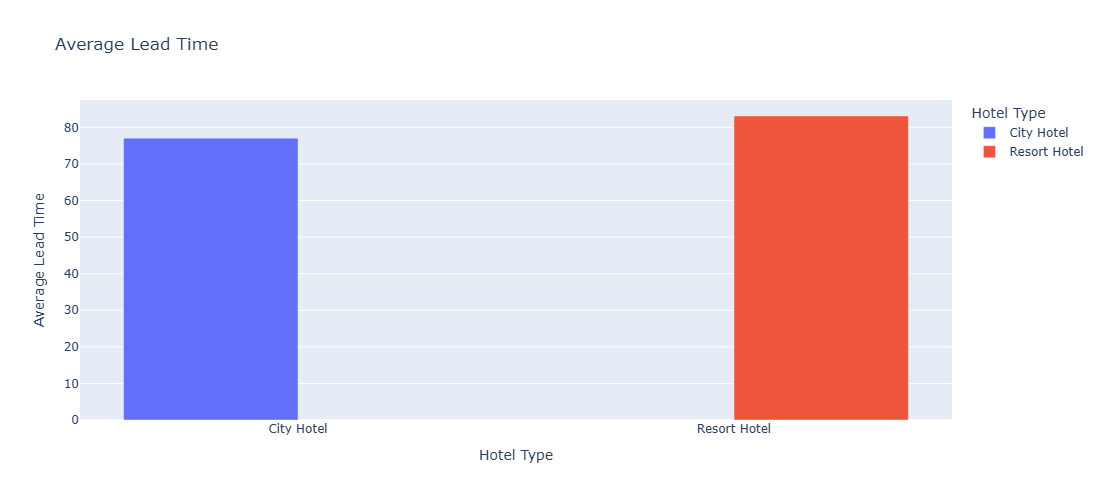

In [91]:
# Plot bar graphs
fig = px.bar(average_lead_time, x='Hotel Type', y='Average Lead Time', color='Hotel Type',
             title='Average Lead Time', labels={'value': 'Avg'},
             barmode = 'group'
             )

# Update layout to vary length and width
fig.update_layout(
    width=1000,
    height=500,
    bargap=0.2,
)

fig.show()

In [53]:

# A te-test to determine significance of booking lead times

from scipy.stats import ttest_ind

# Separate leradtime data for each hotel type
lead_time_city_hotel = df[df['Hotel Type'] == 'City Hotel']['Lead Time']
lead_time_resort_hotel = df[df['Hotel Type'] == 'Resort Hotel']['Lead Time']

# Perform an independent t-test
t_statistic, p_value = ttest_ind(lead_time_city_hotel, lead_time_resort_hotel)

# Print results
print('T-Test Results')
print('T-statistic', t_statistic)
print('p_value', p_value)

if p_value < 0.05:
    print("There is a significant difference in lead time between city hotel and resort hotel")
else:
    print("There is no significant difference in lead time between city hotel and resort hotel")
     

T-Test Results
T-statistic -10.134486922389096
p_value 4.0078963961754715e-24
There is a significant difference in lead time between city hotel and resort hotel


# 4. Customers with highest lead times for hotel types

In [98]:

# Group data by Customer Type and Hotel Type, then calculate the maximum lead time for each group
highest_lead_time = df.groupby(['Customer Type', 'Hotel Type'])['Lead Time'].max().reset_index()

# Sort the DataFrame by lead time in descending order to find the customers with the highest lead time
highest_lead_time_sorted = highest_lead_time.sort_values(by='Lead Time', ascending=False)

# Display the customers with the highest lead time for each hotel type
print(highest_lead_time_sorted)


     Customer Type    Hotel Type  Lead Time
5        Transient  Resort Hotel        737
4        Transient    City Hotel        629
7  Transient-Party  Resort Hotel        542
1         Contract  Resort Hotel        532
6  Transient-Party    City Hotel        518
2            Group    City Hotel        468
0         Contract    City Hotel        380
3            Group  Resort Hotel        361


# 5. Mean lead times for difefrent customers

In [55]:

# Group data by Customer Type and Hotel Type, then calculate the maximum lead time for each group
mean_lead_time = df.groupby(['Customer Type', 'Hotel Type'])['Lead Time'].mean().reset_index()

# Sort the DataFrame by lead time in descending order to find the customers with the highest lead time
mean_lead_time_sorted = mean_lead_time.sort_values(by='Lead Time', ascending=False)

# Display the customers with the highest lead time for each hotel type
print(mean_lead_time_sorted)

     Customer Type    Hotel Type   Lead Time
1         Contract  Resort Hotel  163.894451
7  Transient-Party  Resort Hotel  115.476619
6  Transient-Party    City Hotel  109.864167
4        Transient    City Hotel   73.630972
5        Transient  Resort Hotel   73.193707
3            Group  Resort Hotel   54.754579
2            Group    City Hotel   48.448148
0         Contract    City Hotel   47.081363


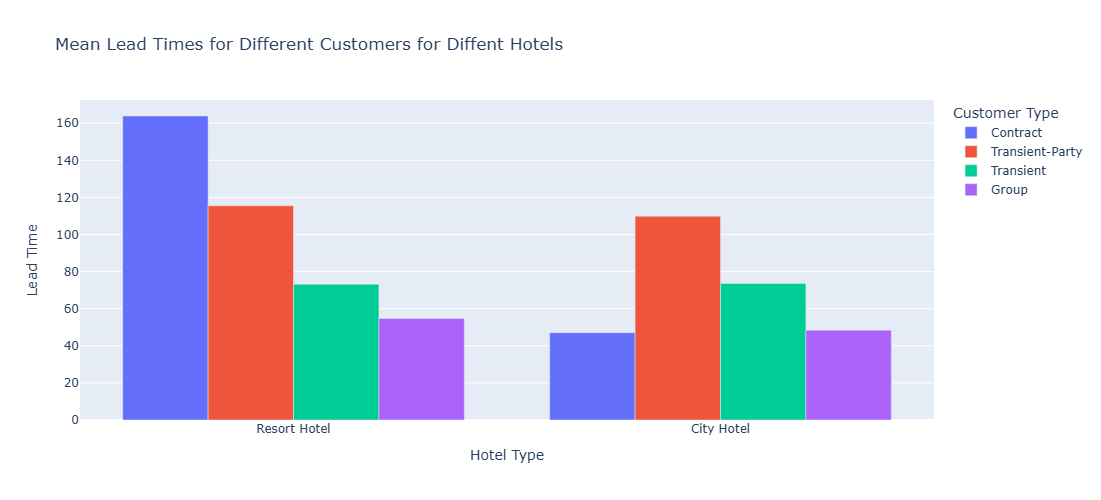

In [92]:

# Plot bar graphs
fig = px.bar(mean_lead_time_sorted, x='Hotel Type', y='Lead Time', color='Customer Type',
             title='Mean Lead Times for Different Customers for Diffent Hotels', labels={'value': 'Total'},
             barmode = 'group'
             )

# Update layout to vary length and width
fig.update_layout(
    width=1100,
    height=500,
    bargap=0.2,
)

fig.show()

# 6. Reservation Status:

Examine the distribution of reservation statuses for each hotel type.

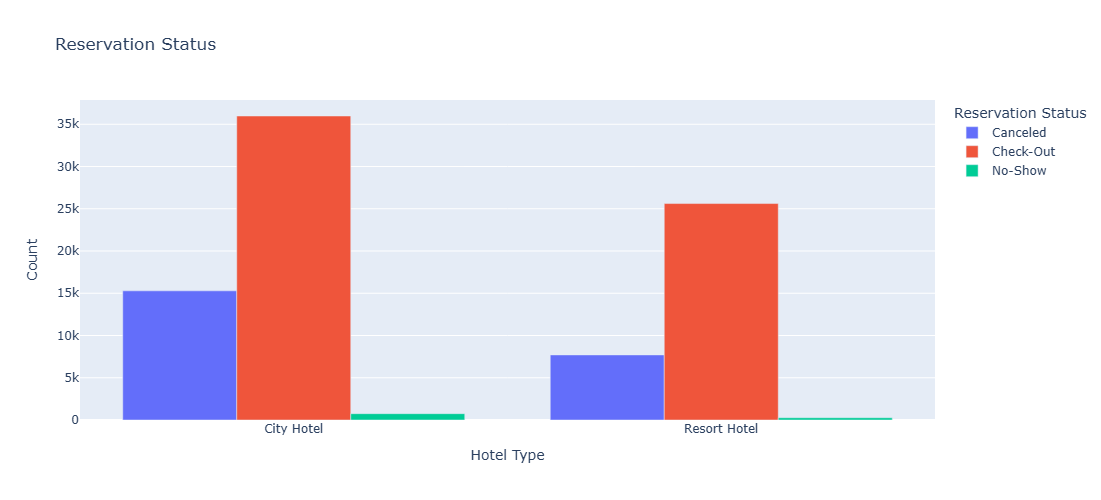

In [94]:

reservation_status = df.groupby(['Hotel Type', 'Reservation Status']).size().reset_index(name='Count')

# Plot bar graphs
fig = px.bar(reservation_status, x='Hotel Type', y='Count', color='Reservation Status',
             title='Reservation Status', labels={'value': 'Total'},
             barmode = 'group'
             )

# Update layout to vary length and width
fig.update_layout(
    width=900,
    height=500,
    bargap=0.2,
)

fig.show()

# 7. Compare customer type and reservation for different hotel type

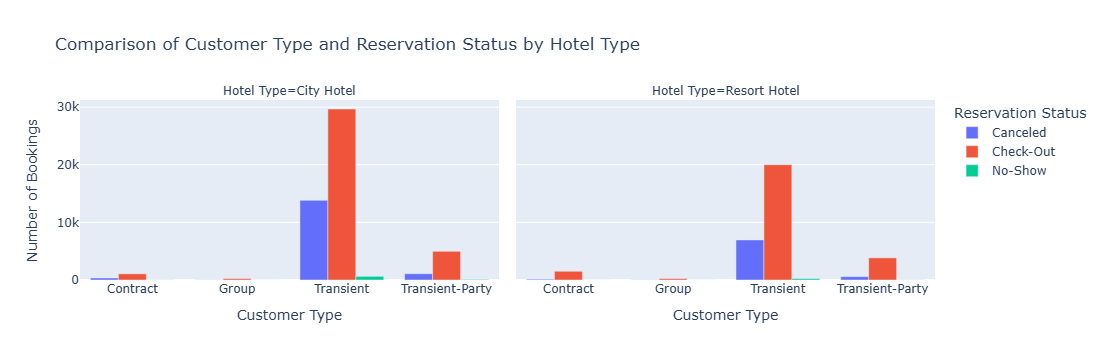

In [93]:

# Group data by Customer Type, Reservation Status, and Hotel Type, then count occurrences
customer_reservation_type = df.groupby(['Customer Type', 'Reservation Status', 'Hotel Type']).size().reset_index(name='Count')

# Create a bar chart to compare Customer Type and Reservation Status for each hotel type
fig = px.bar(customer_reservation_type, x = 'Customer Type', y = 'Count',
             color = 'Reservation Status', facet_col = 'Hotel Type',
             labels = {'Customer Type': 'Customer Type', 'Count': 'Number of Bookings'},
             title = 'Comparison of Customer Type and Reservation Status by Hotel Type',
             barmode = 'group')

# Show the plot
fig.show()


# 8. Deposit and reservation status

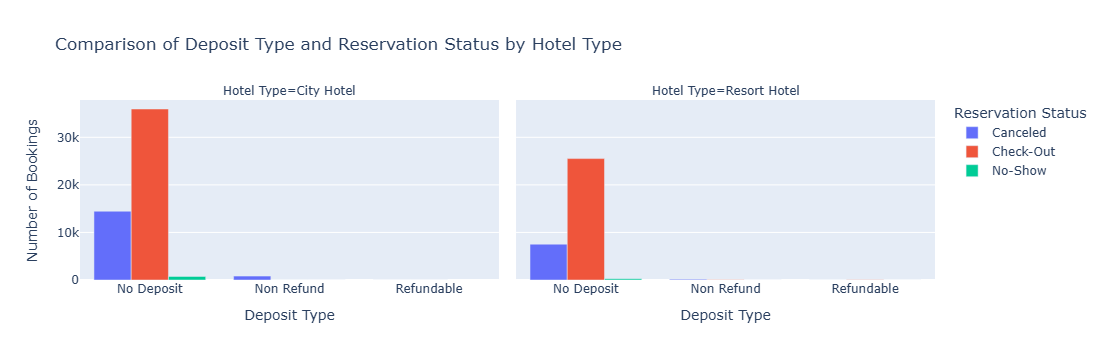

In [59]:

# Group data by Deposit Type, Reservation Status, and Hotel Type, then count occurrences
deposit_reservation_status = df.groupby(['Deposit Type', 'Reservation Status', 'Hotel Type']).size().reset_index(name='Count')

# Create a bar chart to compare Deposit Type and Reservation Status for each hotel type
fig = px.bar(deposit_reservation_status, x='Deposit Type', y='Count',
                                  color='Reservation Status', facet_col='Hotel Type',
                                  labels={'Deposit Type': 'Deposit Type', 'Count': 'Number of Bookings'},
                                  title='Comparison of Deposit Type and Reservation Status by Hotel Type',
                                  barmode='group')

# Show the plot
fig.show()
     

# 9. Room Type Preferences

In [60]:

room_type_distribution = df.groupby(['Hotel Type', 'Reserved Room Type']).size().unstack(fill_value=0)

room_type_distribution = room_type_distribution.reset_index()

room_type_distribution
     

Reserved Room Type,Hotel Type,A,B,C,D,E,F,G,H,L,P
0,City Hotel,36654,977,14,10670,1463,1753,478,0,0,4
1,Resort Hotel,18334,3,898,6568,4548,1059,1571,596,6,2


Assigned room type

In [61]:

assigned_room_type = df.groupby(['Hotel Type', 'Assigned Room Type']).size().unstack(fill_value=0)
assigned_room_type =assigned_room_type.reset_index()
assigned_room_type

Assigned Room Type,Hotel Type,A,B,C,D,E,F,G,H,I,K,L,P
0,City Hotel,32320,1598,161,12969,2036,1964,689,0,0,272,0,4
1,Resort Hotel,12708,159,1985,9122,5097,1645,1804,706,356,0,1,2


# 10. Average days in waiting list

In [62]:

# Calculate average days in waiting list for each hotel type
avg_waiting_list_days = df.groupby('Hotel Type')['Days in Waiting List'].mean().reset_index(name='Avg Days in Waiting List')

# Display the average days in waiting list for different hotels
avg_waiting_list_days

,Hotel Type,Avg Days in Waiting List
0,City Hotel,0.922442
1,Resort Hotel,0.319399


# 11. Average daily rate (ADR)

In [63]:

average_daily_rate = df.groupby('Hotel Type')['Average Daily Rate'].mean().reset_index(name='Average Daily Rate')
average_daily_rate

,Hotel Type,Average Daily Rate
0,City Hotel,111.304907
1,Resort Hotel,99.388158


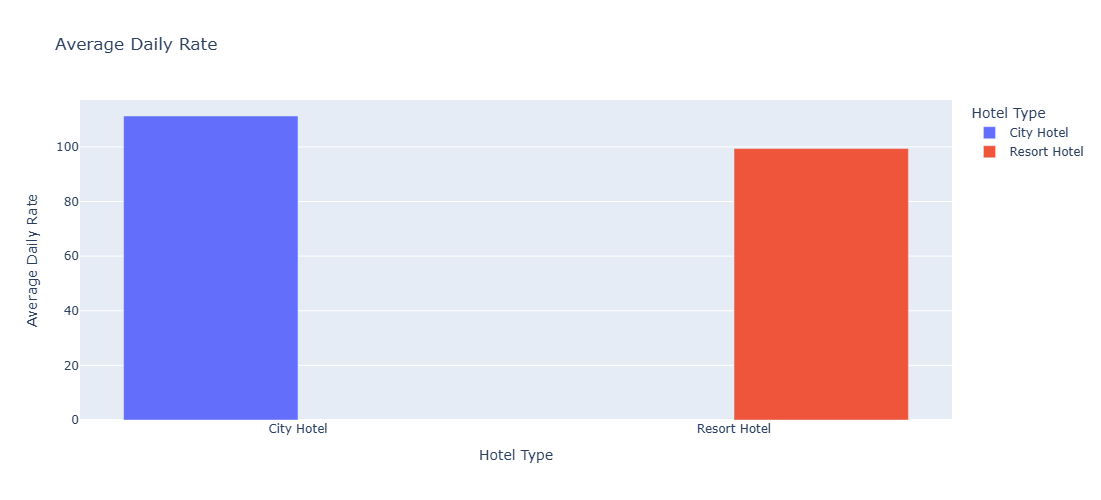

In [64]:

# Plot bar graphs
fig = px.bar(average_daily_rate, x='Hotel Type', y='Average Daily Rate', color='Hotel Type',
             title='Average Daily Rate', labels={'value': 'Avg'},
             barmode = 'group'
             )

# Update layout to vary length and width
fig.update_layout(
    width=1000,
    height=500,
    bargap=0.2,
)

fig.show()

In [65]:

# Separate ADR data for each hotel type
adr_city_hotel = df[df['Hotel Type'] == 'City Hotel']['Average Daily Rate']
adr_resort_hotel = df[df['Hotel Type'] == 'Resort Hotel']['Average Daily Rate']

# Perform independent t-test
t_statistic, p_value = ttest_ind(adr_city_hotel, adr_resort_hotel)

# Print results
print('T-Test Results')
print('T-statistic:', t_statistic)
print('p-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference in ADR between City Hotel and Resort Hotel")
else:
    print("There is no significant difference in ADR between City Hotel and Resort Hotel ")

T-Test Results
T-statistic: 30.94977936747957
p-value: 3.677700188572133e-209
There is a significant difference in ADR between City Hotel and Resort Hotel


# 12. Customer Type and ADR

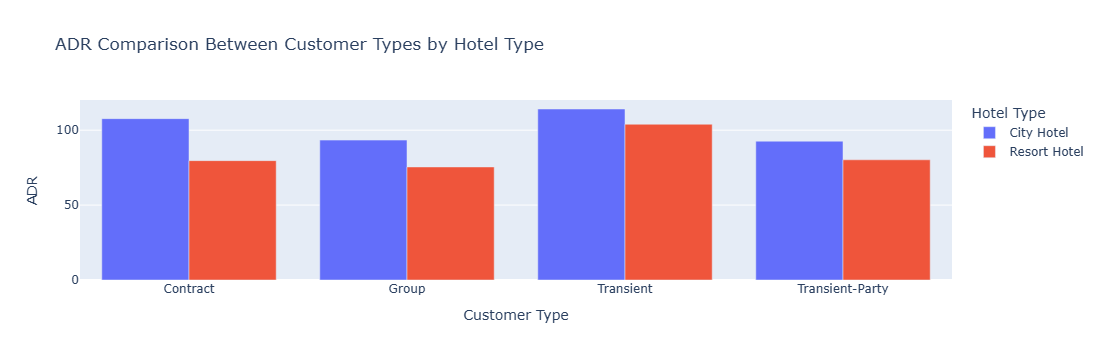

In [66]:

adr_customer_type = df.groupby(['Customer Type', 'Hotel Type'])['Average Daily Rate'].mean().reset_index()

# Create a bar chart to compare ADR between customer types for each hotel type
fig = px.bar(adr_customer_type, x='Customer Type', y='Average Daily Rate',
             color='Hotel Type', barmode='group',
             labels={'Customer Type': 'Customer Type', 'Average Daily Rate': 'ADR'},
             title='ADR Comparison Between Customer Types by Hotel Type')

# Show the plot
fig.show()

# 13. ADR and meal type

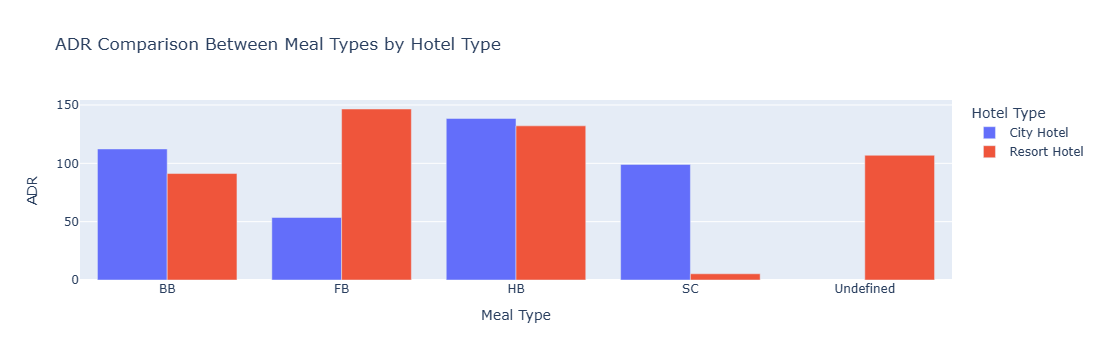

In [67]:
# Group data by Meal Type and Hotel Type, then calculate mean ADR
adr_meal_type = df.groupby(['Meal Type', 'Hotel Type'])['Average Daily Rate'].mean().reset_index()

# Create a bar chart to compare ADR between meal types for each hotel type
fig = px.bar(adr_meal_type, x='Meal Type', y='Average Daily Rate',
             color='Hotel Type', barmode='group',
             labels={'Meal Type': 'Meal Type', 'Average Daily Rate': 'ADR'},
             title='ADR Comparison Between Meal Types by Hotel Type')

# Show the plot
fig.show()
     

# 14. Average Daily rate when parking is required

In [68]:

# Filter the DataFrame to include only rows where parking space is required
parking_required_df = df[df['Parking Spaces Required'] > 0]

# Calculate the average daily rate for each hotel type when parking space is required
avg_adr_parking_required = parking_required_df.groupby('Hotel Type')['Average Daily Rate'].mean().reset_index(name='Average Daily Rate')

# Display the average daily rate for different hotel types when parking space is required
avg_adr_parking_required

,Hotel Type,Average Daily Rate
0,City Hotel,122.227123
1,Resort Hotel,110.725550


In [69]:
# Filter the DataFrame to include only rows where parking space is required
parking_df = df[df['Parking Spaces Required'] > 0]

# Separate ADR data for each hotel type
adr_city_hotel = parking_df[parking_df['Hotel Type'] == 'City Hotel']['Average Daily Rate']
adr_resort_hotel = parking_df[parking_df['Hotel Type'] == 'Resort Hotel']['Average Daily Rate']

# Perform independent t-test
t_statistic, p_value = ttest_ind(adr_city_hotel, adr_resort_hotel)

# Print results
print('T-Test Results')
print('T-statistic:', t_statistic)
print('p-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference in ADR between City Hotel and Resort Hotel when parking is required")
else:
    print("There is no significant difference in ADR between City Hotel and Resort Hotel when parking is required")
     

T-Test Results
T-statistic: 6.964189801340845
p-value: 3.5908160194544313e-12
There is a significant difference in ADR between City Hotel and Resort Hotel when parking is required


# 15. Time Series Analysis


Arrival Day of month

In [70]:

# Converting arrival datw to a datetime format
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])

# Extract day of month
df['Day of Month'] = df['Arrival Date'].dt.day

# Group the data by day of month and hotel type, sum the number of arrivals for each day and hotel type
daily_arrivals = df.groupby(['Day of Month', 'Hotel Type']).size().unstack(fill_value=0)

daily_arrivals.head()


Hotel Type,City Hotel,Resort Hotel
Day of Month,,
1,1577,1163
2,1830,1114
3,1735,1056
4,1662,1088
5,1787,1131


In [71]:

# Reset index
daily_arrivals_reset = daily_arrivals.reset_index()

daily_arrivals_reset.head()
     

Hotel Type,Day of Month,City Hotel,Resort Hotel
0,1,1577,1163
1,2,1830,1114
2,3,1735,1056
3,4,1662,1088
4,5,1787,1131


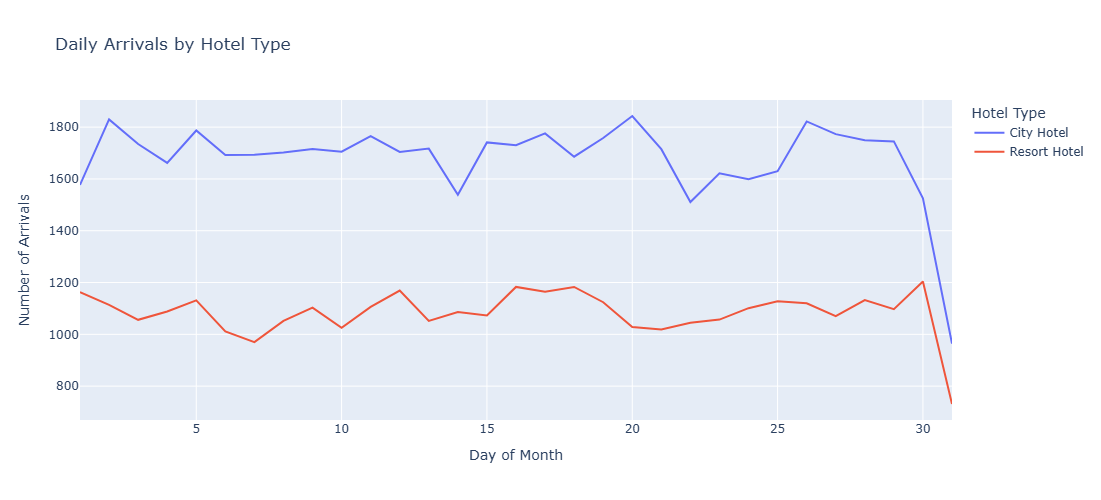

In [72]:

# Create the line graph using Plotly Express
fig = px.line(daily_arrivals.reset_index(), x='Day of Month', y=['City Hotel', 'Resort Hotel'],
              labels={'Day of Month': 'Day of Month', 'value': 'Number of Arrivals', 'variable': 'Hotel Type'},
              title='Daily Arrivals by Hotel Type',
              width=800, height=500)

# Show the plot
fig.show()

Arrival by week number

In [73]:

weekly_arrivals = df.groupby(['Arrival Week', 'Hotel Type']).size().unstack(fill_value=0)

weekly_arrivals.head()

Hotel Type,City Hotel,Resort Hotel
Arrival Week,,
1,553,300
2,528,408
3,568,450
4,611,469
5,621,460


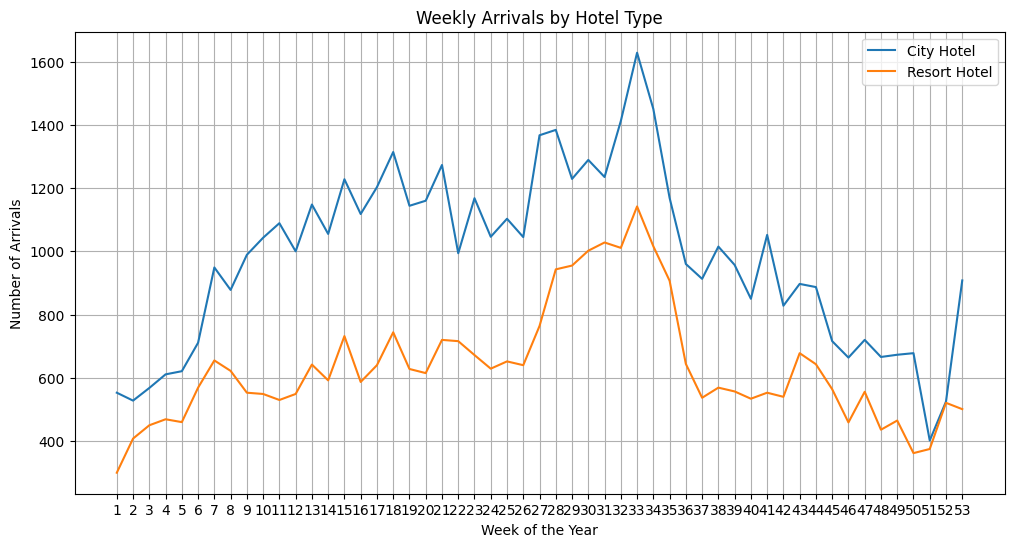

In [74]:

# Plot line graph for weekly arrivals
plt.figure(figsize=(12, 6))
plt.plot(weekly_arrivals.index, weekly_arrivals['City Hotel'], label='City Hotel')
plt.plot(weekly_arrivals.index, weekly_arrivals['Resort Hotel'], label='Resort Hotel')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Arrivals')
plt.title('Weekly Arrivals by Hotel Type')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 54))  # Set x-axis ticks for weeks 1 to 53
plt.show()
     

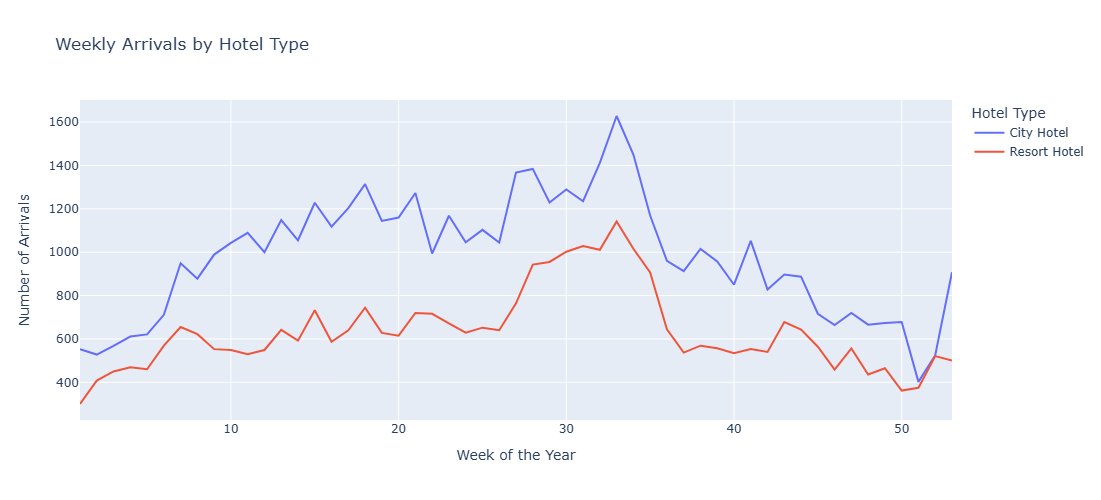

In [75]:
# Reset index to make 'Arrival Week' a regular column
weekly_arrivals_reset = weekly_arrivals.reset_index()

# Plot the interactive line graph
fig = px.line(weekly_arrivals_reset, x='Arrival Week', y=['City Hotel', 'Resort Hotel'],
              labels={'Arrival Week': 'Week of the Year', 'value': 'Number of Arrivals', 'variable': 'Hotel Type'},
              title='Weekly Arrivals by Hotel Type',
              width=1000, height=500)

# Show the chart
fig.show()
     

Arrivals during a month

In [76]:

# Extract the month information from the "Arrival Date" column
df['Arrival Month'] = df['Arrival Date'].dt.month

# Group the data by 'Arrival Month' and 'Hotel Type', then count the number of arrivals for each month and hotel type.
monthly_arrivals = df.groupby(['Arrival Month', 'Hotel Type']).size().unstack(fill_value=0)

monthly_arrivals.head()

Hotel Type,City Hotel,Resort Hotel
Arrival Month,,
1,2651,1932
2,3537,2457
3,4769,2579
4,4978,2793
5,5228,2915


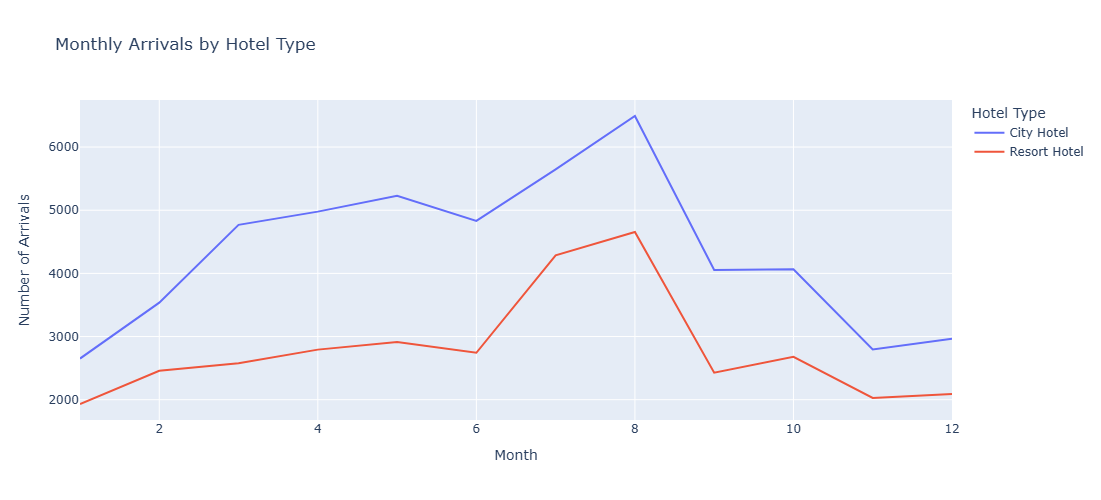

In [77]:
# Plot line graph for monthly arrivals using Plotly Express
fig = px.line(monthly_arrivals.reset_index(), x='Arrival Month', y=['City Hotel', 'Resort Hotel'],
              labels={'Arrival Month': 'Month', 'value': 'Number of Arrivals', 'variable': 'Hotel Type'},
              title='Monthly Arrivals by Hotel Type',
              width=800, height=500)

# Show the plot
fig.show()
     

How ADR behaves during a year

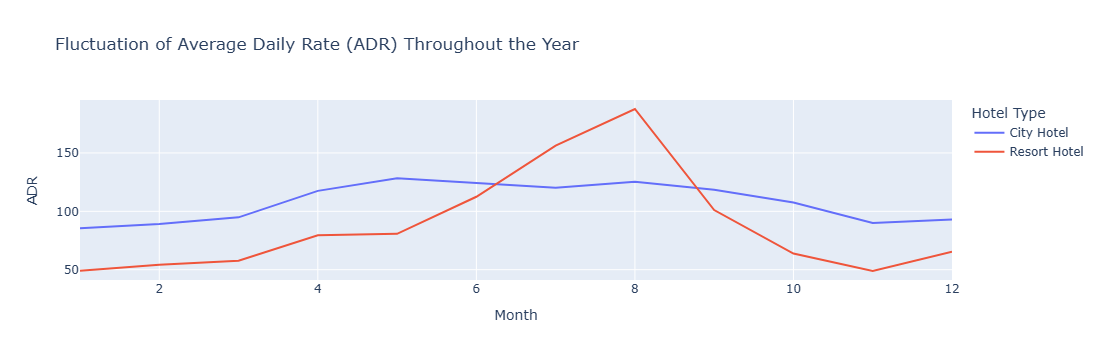

In [78]:

# Calculate monthly ADR for each hotel type
monthly_adr = df.groupby(['Hotel Type', 'Arrival Month'])['Average Daily Rate'].mean().reset_index()

# Plot the monthly ADR data
fig = px.line(monthly_adr, x='Arrival Month', y='Average Daily Rate', color='Hotel Type',
              title='Fluctuation of Average Daily Rate (ADR) Throughout the Year',
              labels={'Arrival Month': 'Month', 'Average Daily Rate': 'ADR'},
              line_shape='linear')

# Show the plot
fig.show()
     